In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#使用美国各大城市距离数据CITY_DISTANCE
data = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/city_distance.csv',skipinitialspace=True)
data

,City,Atlanta,Chicago,Denver,Houston,LosAngeles,Miami,NewYork,SanFrancisco,Seattle,Wanshington
0,Atlanta,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chicago,587,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denver,1212,920.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Houston,701,940.0,879.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,LosAngeles,1936,1745.0,831.0,1374.0,0.0,NaN,NaN,NaN,NaN,NaN
5,Miami,604,1188.0,1726.0,968.0,2339.0,0.0,NaN,NaN,NaN,NaN
6,NewYork,748,713.0,1631.0,1420.0,2451.0,1092.0,0.0,NaN,NaN,NaN
7,SanFrancisco,2139,1858.0,949.0,1645.0,347.0,2594.0,2571.0,0.0,NaN,NaN
8,Seattle,2182,1737.0,1021.0,1891.0,959.0,2734.0,2408.0,678.0,0.0,NaN
9,Wanshington,543,597.0,1494.0,1220.0,2300.0,923.0,205.0,2442.0,2329.0,0.0


In [14]:
data_filled = data.fillna(0)
distance_array = np.array(data_filled.iloc[:,1:])
transpose_dis = distance_array.T
cities = distance_array+transpose_dis
cities = pd.DataFrame(cities,columns=data.City,index=data.City)

In [13]:
#建模
from sklearn.manifold import MDS

mds = MDS(n_components=2,dissimilarity='precomputed',random_state=2)

In [15]:
#压力函数值
mds.fit(cities)
mds.stress_

352.4462595786322

In [16]:
mds.embedding_#两个维度的值

array([[  726.81822293,    84.19516075],
       [  259.47309889,   442.84915186],
       [ -467.37579004,  -119.66669242],
       [  328.54380839,  -494.8021748 ],
       [-1028.20824469,  -732.8125738 ],
       [ 1254.97159746,  -205.0540706 ],
       [  864.4353312 ,   818.65952468],
       [-1317.82321631,  -539.70542876],
       [-1452.00875155,   129.67779139],
       [  831.17394371,   616.65931171]])

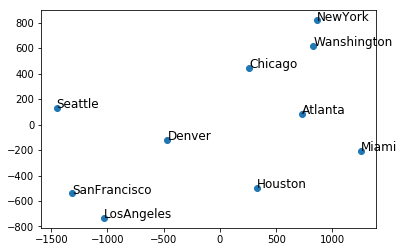

In [18]:
#绘制感知图
x = mds.embedding_[:,0]
y = mds.embedding_[:,1]
plt.scatter(x,y)
for a,b,s in zip(x,y,data.City):
    plt.text(a,b+0.1,s,fontsize=12)